# Workshop 2: Detectron2 for object detection

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

In this workshop we will go through some basics usage of detectron2 for object detection

# 0. Download the dataset

1.   Go to [Link to Data](https://public.roboflow.com/object-detection/hard-hat-workers/2)
2.   Create an account
3.   Select the Terminal code option
4.   Copy and paste the code below to download the data




In [1]:
!curl -L "https://public.roboflow.com/ds/Wf5ztMjw7E?key=lXwmSbOjvR" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: train/002922_jpg.rf.0d24f020d6f688f966ef38c7a0eeba3e.jpg  
 extracting: train/003070_jpg.rf.0d4f1aa374695130ec80a94eb7d3029f.jpg  
 extracting: train/000927_jpg.rf.0c8662a3294885b1dce0b9c9f71bf63d.jpg  
 extracting: train/004334_jpg.rf.0c7c46e2c74725ad2f93e916dc2422dd.jpg  
 extracting: train/000735_jpg.rf.0d5b96188e544511c13ac1e1bfff0b87.jpg  
 extracting: train/001653_jpg.rf.0cc3a72fd244aa7aadee6c4d766190df.jpg  
 extracting: train/004320_jpg.rf.0cedfd83d5055b3a601e711b7e1c149c.jpg  
 extracting: train/002055_jpg.rf.0d0d8e31527f9ca4331834bd0923016e.jpg  
 extracting: train/004879_jpg.rf.0d5c27700ff04fb911be2cc0b0ae7e44.jpg  
 extracting: train/001254_jpg.rf.0cb559668c7f79bc74c9f6b1a276d90d.jpg  
 extracting: train/002336_jpg.rf.0ca4ec6f6ebaabe8df1781814ea731d9.jpg  
 extracting: train/000307_jpg.rf.0da33908e280d7c9d61d7cb6470ecd3f.jpg  
 extracting: train/004239_jpg.rf.0da69bb76e5393015f1e10528419a3fd.jpg  
 ex

In [2]:
!ls

README.dataset.txt  README.roboflow.txt  sample_data  test  train


In [3]:
from pathlib import Path
import json
import cv2
from matplotlib import pyplot as plt

# 1. Explore data

In [4]:
TRAIN_DIR = Path('train')
TEST_DIR = Path('test')
ANNOTATIONS_TRAIN_PATH = TRAIN_DIR / '_annotations.coco.json'
ANNOTATIONS_TEST_PATH = TEST_DIR / '_annotations.coco.json'

In [5]:
with open(ANNOTATIONS_TRAIN_PATH, 'rb') as f:
  annotations_train = json.load(f)
annotations_train.keys()
annotations_train.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [6]:
annotations_train['images'][0]

{'id': 0,
 'license': 1,
 'file_name': '002310_jpg.rf.0008cd4590d2edb0e1447329236d9c11.jpg',
 'height': 319,
 'width': 489,
 'date_captured': '2020-04-30T03:26:22+00:00'}

In [7]:
annotations_train['annotations'][1]

{'id': 1,
 'image_id': 0,
 'category_id': 2,
 'bbox': [267, 122, 34, 34],
 'area': 1156,
 'segmentation': [],
 'iscrowd': 0}

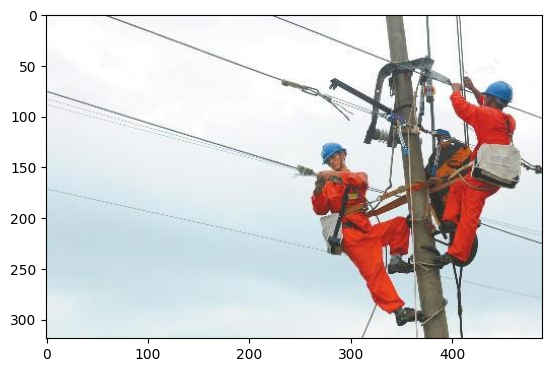

In [8]:
img = cv2.imread('train/002310_jpg.rf.0008cd4590d2edb0e1447329236d9c11.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# 2. Import data on Detectron2

In [9]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 2.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15681, done.
remote: Counting objects: 100% (404/404), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 15681 (delta 180), reused 274 (delta 94), pack-reused 15277
Receiving objects: 100% (15681/15681), 6.50 MiB | 15.14 MiB/s, done.
Resolving deltas: 100% (11292/11292), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00

In [10]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog
from detectron2.data.datasets import register_coco_instances

In [11]:
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

WARNING [05/27 12:16:30 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/27 12:16:30 d2.data.datasets.coco]: Loaded 5269 images in COCO format from /content/train/_annotations.coco.json


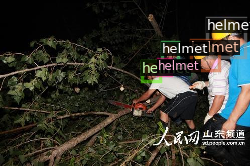

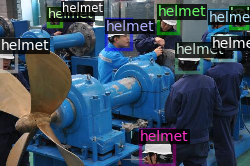

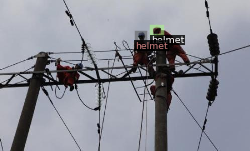

In [12]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

# 3. SET MODEL CONFIGURATION

In [13]:
# DOC: https://detectron2.readthedocs.io/en/latest/modules/config.html
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_test",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 300 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = []

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3

cfg.TEST.EVAL_PERIOD = 300

# 4. Train model

In [14]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [15]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[05/27 12:16:32 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
model_final_68b088.pkl: 421MB [00:04, 96.7MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[05/27 12:16:38 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[05/27 12:18:13 d2.utils.events]:  eta: 0:20:06  iter: 19  total_loss: 2.012  loss_cls: 1.257  loss_box_reg: 0.5485  loss_rpn_cls: 0.2092  loss_rpn_loc: 0.02827    time: 4.3778  last_time: 4.3581  data_time: 0.0627  last_data_time: 0.0432   lr: 6.427e-05  max_mem: 10913M
[05/27 12:19:44 d2.utils.events]:  eta: 0:18:57  iter: 39  total_loss: 1.664  loss_cls: 0.8192  loss_box_reg: 0.7894  loss_rpn_cls: 0.06395  loss_rpn_loc: 0.02182    time: 4.3870  last_time: 4.6665  data_time: 0.0348  last_data_time: 0.0422   lr: 0.00013087  max_mem: 10913M
[05/27 12:21:12 d2.utils.events]:  eta: 0:17:24  iter: 59  total_loss: 1.543  loss_cls: 0.5936  loss_box_reg: 0.8744  loss_rpn_cls: 0.02779  loss_rpn_loc: 0.02468    time: 4.3867  last_time: 4.6359  data_time: 0.0335  last_data_time: 0.0410   lr: 0.00019747  max_mem: 10913M
[05/27 12:22:37 d2.utils.events]:  eta: 0:15:49  iter: 79  total_loss: 1.415  loss_cls: 0.4483  loss_box_reg: 0.8982  loss_rpn_cls: 0.02021  loss_rpn_loc: 0.0196    time: 4.3570 

KeyboardInterrupt: 

# 5. Evaluate in test set

In [ ]:
from detectron2.utils.visualizer import ColorMode

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

In [ ]:
dataset_dicts = DatasetCatalog.get("my_dataset_test")
for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=my_dataset_train_metadata,
                   scale=0.5,
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
from detectron2.data import build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)